In [88]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(
    style='ticks',
    font_scale=1.5
)

def fig_panel_labels(axes, letters='ABCDEFGHIJKLMNOP', xcoord=-0.17, ycoord=0.92, panel_label_size=plt.rcParams[ 'axes.titlesize']*1.3):
    return [
        ax.annotate(letter, (xcoord, ycoord), xycoords='axes fraction', fontsize=panel_label_size)
        for ax, letter 
        in zip(axes.flat, letters)
    ]

(0, 1)

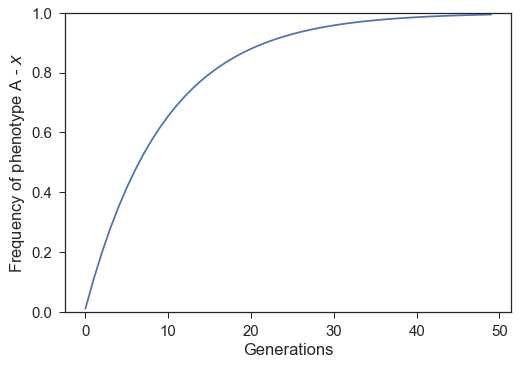

In [17]:
def x(t, x0, ρ):
    return 1 - (1-ρ)**t * (1-x0)

t = np.arange(0, 50)
ρ = 0.1
x0 = 0.01
plt.plot(t, x(t, x0, ρ))
plt.xlabel('Generations')
plt.ylabel('Frequency of phenotype A - $x$')
plt.ylim(0, 1)
# sns.despine()

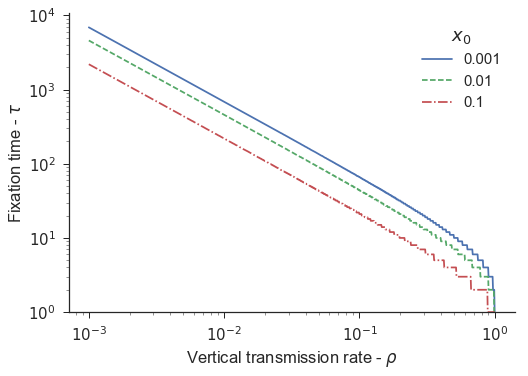

In [233]:
def τ(x0, ρ):
    return np.ceil(
        np.log(x0/(1-x0)) / np.log(1-ρ)
    )

def plot_fixation_time(ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    ρ = np.logspace(-3, -0.0001, 1000)
    x0s = 0.001, 0.01, 0.1
    lss = ('-', '--', '-.')
    for x0, ls in zip(x0s, lss):
        ax.plot(ρ, τ(x0, ρ), ls=ls, label=x0)

    ax.set(
        xlabel=(r'Vertical transmission rate - $\rho$'),
        ylabel=(r'Fixation time - $\tau$'),
        xscale=('log'),
        yscale=('log'),
        ylim=(1, None)
    )
    ax.legend(title='$x_0$')
    sns.despine()
    return ax

ax = plot_fixation_time()

In [79]:
def recursion(x, ρ, P):
    #mA mB MA MB
    x1, x2, x3, x4 = x
    x1_ = x1 * ((1 - ρ) * (x1 + x3) + ρ)
    x2_ = x1 * (1 - ρ) * (x2 + x4)
    x3_ = x3 * ((1 - P) * (x1 + x3) + P)
    x4_ = x3 * (1 - P) * (x2 + x4)
    x = x1_, x2_, x3_, x4_
    x = np.array(x)
    x /= x.sum()
    return x

recursion((0.4,0.4,0.1,0.1), 0.1, 0.01)

array([ 0.44 ,  0.36 ,  0.101,  0.099])

In [217]:
def evolution(ρ0=0.1, P0=0.01, m0 = 0.999, A0 = 0.1, n = 100):
    ρ = ρ0
    P = P0
    x = np.zeros((4, n))
    x[:, 0] = [m0*A0, m0*(1-A0), (1-m0)*A0, (1-m0)*(1-A0)]

    for t in range(1, n):
        x[:, t] = recursion(
            x[:, t-1], ρ, P
        )    
    return x

In [267]:
ρ0 = 0.1 # rate for m
P0 = 0.01 # rate for M
x0 = 0.01 # initial frequency of A
m0 = 0.01 # initial frequency of m
n = 60
x = evolution(ρ0=ρ0, P0=P0, A0=x0, m0=m0, n=n)

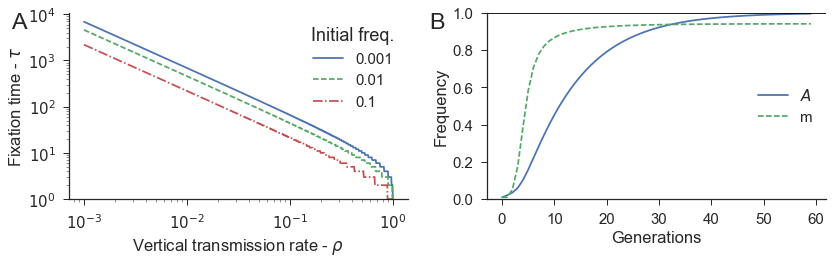

In [268]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharex=False, sharey=False)

plot_fixation_time(ax=axes[0])
axes[0].legend(loc='upper right', title='Initial freq.')
axes[1].plot(x[0]+x[2], label='$A$')
axes[1].plot(x[0]+x[1], ls='--', label='m')
# axes[1].plot(x[2]+x[3], ls='-.', label='M')
axes[1].axhline(1, color='k')
axes[1].set(ylabel='Frequency', xlabel='Generations', ylim=(0,1))
axes[1].legend(loc='center right')
fig_panel_labels(axes)
fig.tight_layout()
sns.despine()
fig.savefig('../figures/extreme_selection_fixation_time.pdf')